# Comparativa de Operaciones Básicas: Pandas vs Polars vs Data.table

Este notebook compara el rendimiento de operaciones básicas entre las tres librerías principales de procesamiento de datos en Python.

In [1]:
import pandas as pd
import polars as pl
import datatable as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import sys
sys.path.append('..')
from src.benchmarks import run_benchmark, create_sample_data

## 1. Configuración del Entorno de Pruebas

In [21]:
# Crear datos de prueba
N_ROWS = 10_000_000
data = create_sample_data(1_000_000)

# Verificar versiones de las librerías
print(f"Pandas version: {pd.__version__}")
print(f"Polars version: {pl.__version__}")
print(f"Datatable version: {dt.__version__}")

Pandas version: 2.2.2
Polars version: 0.20.6
Datatable version: 1.1.0


## 2. Pruebas de Rendimiento

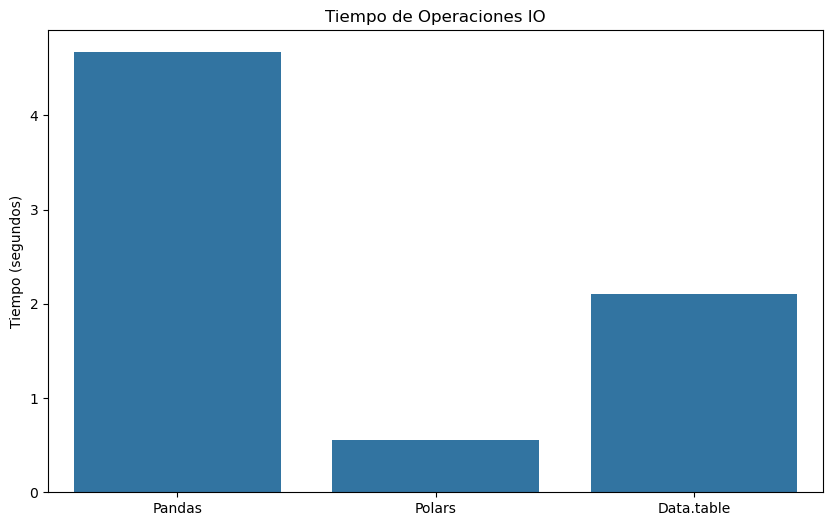

In [22]:
def benchmark_io_operations():
    results = {}
    
    # Pandas
    start = time()
    df_pd = pd.DataFrame(data)
    df_pd.to_csv('test_pandas.csv', index=False)
    df_read = pd.read_csv('test_pandas.csv')
    results['Pandas'] = time() - start
    
    # Polars
    start = time()
    df_pl = pl.DataFrame(data)
    df_pl.write_csv('test_polars.csv')
    df_read = pl.read_csv('test_polars.csv')
    results['Polars'] = time() - start
    
    # Data.table
    start = time()
    data_dt = {}
    for key, value in data.items():
        if hasattr(value, 'dtype') and 'datetime64' in str(value.dtype):
            data_dt[key] = value.astype(str).to_numpy()
        else:
            data_dt[key] = value
    df_dt = dt.Frame(data_dt)
    df_dt.to_csv('test_datatable.csv')
    df_read = dt.fread('test_datatable.csv')
    results['Data.table'] = time() - start
       
    return results

# Ejecutar benchmark
results = benchmark_io_operations()

# Visualizar resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Tiempo de Operaciones IO')
plt.ylabel('Tiempo (segundos)')
plt.show()